In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append("../")
import GSHEWaveform

# Functions to turn on and off custom plotting
def default_mplstyle():
    mpl.rcParams.update(mpl.rcParamsDefault)
    
def custom_mplstyle():
    mpl.style.use("../plot_style.txt")
    
def ylabel_with_offset(ax, label):
    ax.yaxis.offsetText.set_visible(False)
    offset = ax.yaxis.get_major_formatter().get_offset()
    ax.set_ylabel(r"{} {}".format(label, offset))
    
    
%load_ext autoreload
%autoreload 2

Data from the Julia integrator:

In [104]:
def spherical_to_shadow(psi, rho):
    k2 = np.sin(psi)*np.sin(rho)
    k3 = np.cos(psi)
    return k2, k3


runID = "02"

Xgeo = np.load("../data/{}_Xgeo.npy".format(runID))
Xgshe = np.load("../data/{}_Xgshe.npy".format(runID))
coords = np.load("../data/{}_dataCoords.npy".format(runID))
Z = np.load("../data/{}_dataZ.npy".format(runID))

X, Y = np.meshgrid(*[coords[:, 0], coords[:, 1]])

<IPython.core.display.Javascript object>


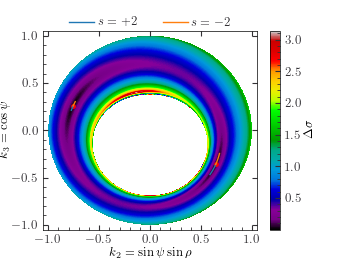

In [105]:
custom_mplstyle()
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
polardict = {0: "+2", 1: "-2"}


plt.figure()
plt.pcolormesh(X, Y, Z, cmap="nipy_spectral", shading="auto", label=None, rasterized=True)
plt.colorbar(label=r"$\Delta \sigma$")


for n in range(2):
    for s in range(2):
        if n == 0:
            label = r"$s = {}$".format(polardict[s])
        else:
            label = None
        plt.plot(*spherical_to_shadow(Xgshe[n, s, :, 0], Xgshe[n, s, :, 1]), c=cycle[s], label=label)
plt.scatter(*spherical_to_shadow(Xgeo[:, 0], Xgeo[:, 1]), s=7, c="red")

plt.legend(ncol=2, loc=9, bbox_to_anchor=(0.5, 1.125))

# plt.axis("off")
plt.xlim(-1.05, 1.05)
plt.ylim(-1.05, 1.05)

plt.xlabel(r"$k_2 = \sin\psi \sin\rho$")
plt.ylabel(r"$k_3 = \cos\psi$")

plt.savefig("/Users/richard/Downloads/shadow.pdf", dpi=450, bbox_inches="tight")

plt.show()